# Пет-проект №1 Most Streamed Spotify Songs 2024

In [6]:
# Импорт необходимых библиотек и данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

    В нашем наборе данных есть 29 показателей, включающих лайки, репосты, просмотры, добавления в плейлист и т.д. Представим, что у нашего заказчика есть сайт для скачивания музыки. Наше ТЗ заключается в том, чтобы определить какие исполнители, треки и альбомы являются наиболее востребованными у аудитории на различных платформах с целью последующего добавления наиболее востребованных треков в базу сайта заказчика, а также его таргетинговой рекламы.
    
    Для этого нам необходимо следующее:
    1. Определить 10 наиболее популярных треков по общим показателям, таким как All Time Rank и Track Score и не имеющих возрастного ограничения.
    2. Отсортировать популярные треки из пункта 1 и сформировать удобную таблицу с названиями треков, альбомов, исполнителей, датами релиза, и ISRC.
    3. Построить диаграмму, показывающую как год выпуска треков влияет на их популярность в 2024 году.
    4. Построить диаграмму, показывающую какие исполнители выпустили больше всего популярных в 2024 году треков.
    5. Вывести статистики по исполнителям из пункта 4.
    6. Установить влияет ли наличие возрастного ограничения на популярность треков в 2024 году на разных платформах.
    7. Определить наиболее популярные треки на каждой из платформ по каждому из показателей, предварительно отфильтровав их по возрастному ограничению, если это требуется исходя из пункта 7. Объединить их в одну таблицу как в пункте 2.

In [8]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Artist'] = df['Artist'].astype('str')
df = df.drop(['TIDAL Popularity'], axis=1)

In [10]:
def cangetype(dframe, start, end):
    for i in np.arange(start, end):
        
        if dframe.iloc[:,i].dtype != 'O':
            continue
            
        dframe.iloc[:,i] = dframe.iloc[:,i].str.replace(",","").astype(float)
    return dframe

In [12]:
df = cangetype(df, 5, 27)

In [14]:
df_ATR = df[df['Explicit Track'] == 0].sort_values(by=['All Time Rank']).head(10)
df_TS = df[df['Explicit Track'] == 0].sort_values(by=['Track Score'], ascending=False).head(10) # ascending - по возростанию

In [359]:
df_ATR

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.0,725.4,390470936.0,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.0,538.4,601309283.0,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4.0,444.9,2031280633.0,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7.0,407.2,900158751.0,73118.0,201585714.0,...,383478.0,429.0,168.0,48197850.0,154.0,65447476.0,57372.0,NaN,9990302.0,0
12,LUNCH,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401991,13.0,316.3,221636195.0,13800.0,197280692.0,...,41344.0,45.0,138.0,38243636.0,163.0,1354692.0,1219.0,1313357.0,450344.0,0
14,bathroom floor,bathroom floor,Kids With Buns,2022-10-07,NLC242100307,15.0,301.6,297185.0,277.0,24445.0,...,1057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3288.0,0
16,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401028,17.0,297.6,395433400.0,12784.0,177932568.0,...,129968.0,3.0,99.0,37988531.0,134.0,9961769.0,13437.0,377734.0,1210029.0,0
18,BLUE,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401996,19.0,292.6,91272461.0,6499.0,52287548.0,...,181.0,1.0,24.0,5054005.0,33.0,283089.0,162.0,975891.0,257661.0,0
19,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612,20.0,292.0,3301814535.0,407119.0,169783402.0,...,1777811.0,4909.0,330.0,12907852.0,189.0,132624772.0,79909.0,NaN,14967379.0,0
24,Future,Future,official sound studio,2024-01-10,RUA1H2415548,25.0,277.5,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [361]:
df_TS

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.0,725.4,390470936.0,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.0,538.4,601309283.0,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4.0,444.9,2031280633.0,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7.0,407.2,900158751.0,73118.0,201585714.0,...,383478.0,429.0,168.0,48197850.0,154.0,65447476.0,57372.0,NaN,9990302.0,0
12,LUNCH,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401991,13.0,316.3,221636195.0,13800.0,197280692.0,...,41344.0,45.0,138.0,38243636.0,163.0,1354692.0,1219.0,1313357.0,450344.0,0
14,bathroom floor,bathroom floor,Kids With Buns,2022-10-07,NLC242100307,15.0,301.6,297185.0,277.0,24445.0,...,1057.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3288.0,0
16,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401028,17.0,297.6,395433400.0,12784.0,177932568.0,...,129968.0,3.0,99.0,37988531.0,134.0,9961769.0,13437.0,377734.0,1210029.0,0
18,BLUE,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401996,19.0,292.6,91272461.0,6499.0,52287548.0,...,181.0,1.0,24.0,5054005.0,33.0,283089.0,162.0,975891.0,257661.0,0
19,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612,20.0,292.0,3301814535.0,407119.0,169783402.0,...,1777811.0,4909.0,330.0,12907852.0,189.0,132624772.0,79909.0,NaN,14967379.0,0
24,Future,Future,official sound studio,2024-01-10,RUA1H2415548,25.0,277.5,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
if np.all(df_ATR.index) == np.all(df_TS.index): df_common = df_ATR = df_TS

In [18]:
Common = df_common.drop(df.iloc[:,5:], axis=1)
Common.index = [str(i) for i in np.arange(1, df_common.index.value_counts().sum()+1)]
Common.to_excel('Common.xlsx')
Common # итоговая таблица для пункта 2

,Track,Album Name,Artist,Release Date,ISRC
1,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777
4,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016
5,LUNCH,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401991
6,bathroom floor,bathroom floor,Kids With Buns,2022-10-07,NLC242100307
7,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401028
8,BLUE,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401996
9,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612
10,Future,Future,official sound studio,2024-01-10,RUA1H2415548


    Наиболее популярными треками, не имеющими возрастного ограничения, как по показателю All Time Rank, так и по показателю Track Score в 2024 году стали: "MILLION DOLLAR BABY" Tommy Richman, "i like the way you kiss me" Artemas, "Flowers" Miley Cyrus, "Beautiful Things" Benson Boone, "LUNCH" Billie Eilish, "bathroom floor" Kids With Buns, "Fortnight (feat. Post Malone)" Taylor Swift, "BLUE" Billie Eilish, "As It Was" Harry Styles и "Future" official sound studio.

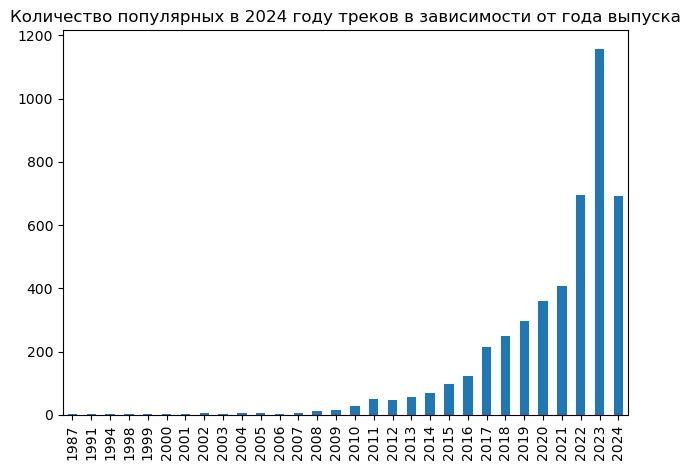

In [116]:
df['Release Date'].dt.year.value_counts().sort_index().plot.bar()
plt.xlabel('')
plt.title('Количество популярных в 2024 году треков в зависимости от года выпуска')
plt.tight_layout()
plt.savefig('Release Date.jpeg',bbox_inches='tight', dpi=300)

    На диаграмме можно видеть, что наибольшее количество популярных в 2024 году треков было выпущено за последние три года. Изменение количества популярных в 2024 году треков в зависимости от года их выпуска носит экспоненциальный характер, исключая последний год выпуска. Это исключение может быть объяснено отсутствием достаточного количества данных за 2024 год на момент их публикации.

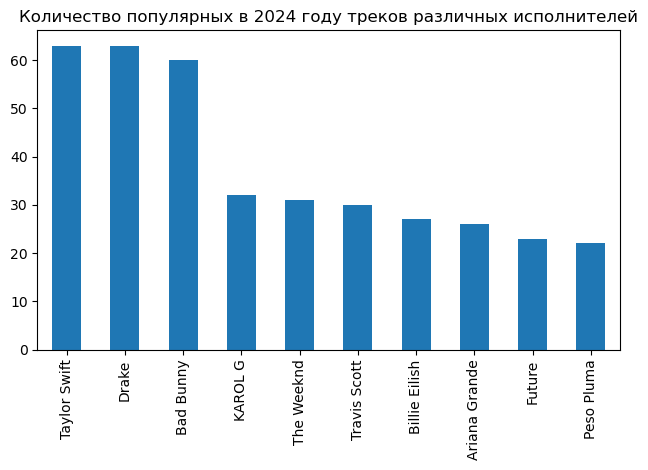

In [114]:
df['Artist'].value_counts().nlargest(10).plot.bar() # считаем количество повторений артистов в нашем наборе данных, 
                                                    # выбираем из полученного ряда 10, имеющих наибольшее количество повторений
                                                    # и рисуем столбчатую диаграмму.
plt.title('Количество популярных в 2024 году треков различных исполнителей')
plt.xlabel('')
plt.tight_layout()
plt.savefig('Artist efficiency.jpeg',bbox_inches='tight', dpi=300)

    Наибольшее количество треков, попавших в рейтинги 2024 года, было выпущено такими исполнителями как: Taylor Swift, Drake, Bad Bunny, KAROL G, The Weeknd, Travis Scott, Billie Eilish, Ariana Grande, Future и Peso Pluma. Особой продуктивностью отличились первые три исполнителя.

In [28]:
df['Artist'].value_counts().nlargest(10).index

Index(['Taylor Swift', 'Drake', 'Bad Bunny', 'KAROL G', 'The Weeknd',
       'Travis Scott', 'Billie Eilish', 'Ariana Grande', 'Future',
       'Peso Pluma'],
      dtype='object', name='Artist')

In [37]:
num = []
for i in df['Artist'].value_counts().nlargest(10).index:
    a = round((df.loc[df[df['Artist'] == i].index, ['Track Score']]).describe(percentiles=[]), 2)
    num.append(a)
n = pd.concat(num, axis=1) # Объеденяем полученные в цикле объекты
n.columns = [df['Artist'].value_counts().nlargest(10).index]
n.to_excel('statistics.xlsx')
n

Artist,Taylor Swift,Drake,Bad Bunny,KAROL G,The Weeknd,Travis Scott,Billie Eilish,Ariana Grande,Future,Peso Pluma
count,63.00,63.00,60.00,32.00,31.00,30.00,27.00,26.00,23.00,22.00
mean,40.90,45.58,47.30,52.34,48.69,47.33,82.26,51.28,62.96,51.41
std,40.36,28.02,36.58,38.67,36.83,32.51,81.52,48.93,65.27,31.49
min,19.70,20.10,19.60,19.60,20.50,19.90,19.60,19.50,19.70,19.60
50%,28.20,33.20,32.20,33.95,38.00,38.35,54.70,33.30,33.80,41.95
max,297.60,122.70,184.80,167.80,194.00,139.50,316.30,262.80,308.20,153.10


    Исходя из полученных значений можно сделать вывод, что наиболее продуктивным исполнителем в 2024 году является Billie Eilish. Медианное и среднее значения у неё наиболее высокие. Это означает, что среди всех её треков большее количество имеет высокие показатели Track Score. Также, у Billie Eilish высокое значение стандартного отклонения, что свидетельствует о наличии как треков с очень низким рейтингом, так и треков с очень высоким рейтингом.
    У такого исполнителя как Drake значение стандартного отклонения наиболее низкое, что говорит о стабильно высоких рейтингах его треков, при этом Track Score наиболее популярных его треков существенно ниже чем у других исполнителей.

In [47]:
Bar = df.dropna().groupby('Explicit Track')[df.columns[7:-1]].sum()
Bar

,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts
Explicit Track,,,,,,,,,,,,,,,,,,,,
0,248838940132.0,34223835.0,14162231791.0,23809.0,171688574782.0,1295575733.0,258073752.0,37900664509.0,371616467134.0,164130838999.0,32948.0,38661414.0,86310.0,16918.0,684168479.0,12887.0,49587977807.0,46983105.0,3112956487.0,1598033873.0
1,147838323504.0,26152547.0,8328077118.0,15584.0,81571530203.0,716839026.0,166069609.0,24912524558.0,232688598500.0,82395336240.0,17838.0,18754581.0,95118.0,7127.0,318925210.0,7113.0,23569027359.0,21946186.0,6294574305.0,737570646.0


In [49]:
Bar1 = Bar.iloc[:, :4].sum(axis=1).to_frame()
Bar1.columns = ['Spotify']
Bar2 = (Bar.iloc[:, 4:6].sum(axis=1) + Bar.iloc[:, 9]).to_frame()
Bar2.columns = ['YouTube']
Bar3 = Bar.iloc[:, 6:9].sum(axis=1).to_frame()
Bar3.columns = ['TikTok']
Bar4 = Bar.iloc[:, 13:15].sum(axis=1).to_frame()
Bar4.columns = ['Deezer']
Bar5 = Bar.iloc[:, 16:18].sum(axis=1).to_frame()
Bar5.columns = ['Pandora']
Bar = pd.concat([Bar1, Bar2, Bar3, Bar5, Bar4, Bar['AirPlay Spins'].rename('AirPlay'), 
                 Bar['Apple Music Playlist Count'].rename('Apple Music'), Bar['SiriusXM Spins'].rename('SiriusXM'), 
                 Bar['Amazon Playlist Count'].rename('Amazon'), Bar['Soundcloud Streams'].rename('Soundcloud'), 
                 Bar['Shazam Counts'].rename('Shazam')], axis=1)

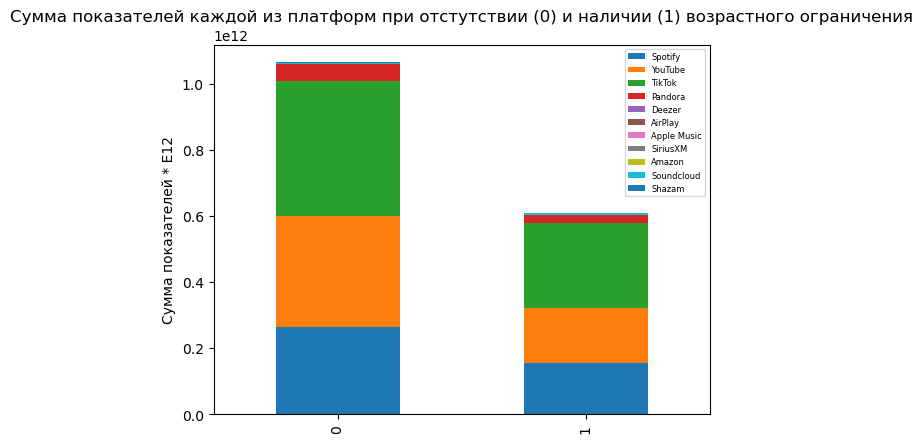

In [194]:
Bar.plot.bar(stacked=True)
plt.title('Сумма показателей каждой из платформ при отстутствии (0) и наличии (1) возрастного ограничения')
plt.ylabel('Сумма показателей * E12')
plt.xlabel('')
plt.legend(prop={'size' : 6})
plt.savefig('Exp_track_1.jpeg',bbox_inches='tight', dpi=300)

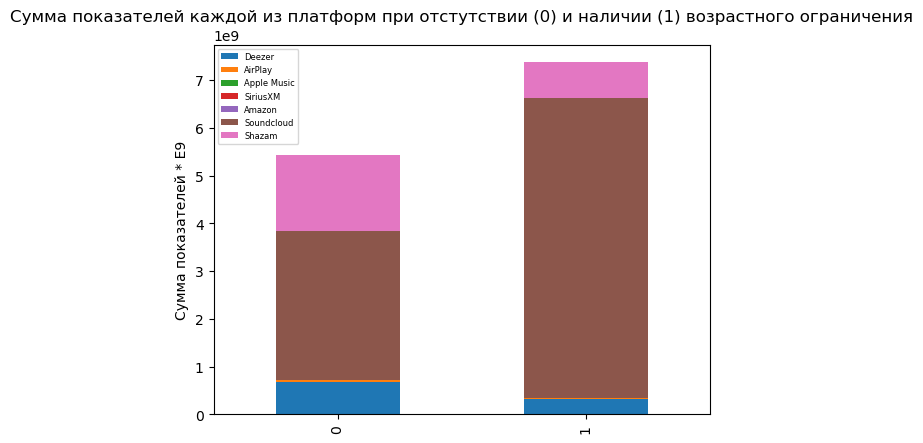

In [195]:
Bar.iloc[:, 4:].plot.bar(stacked=True)
plt.title('Сумма показателей каждой из платформ при отстутствии (0) и наличии (1) возрастного ограничения')
plt.ylabel('Сумма показателей * E9')
plt.xlabel('')
plt.legend(prop={'size' : 6})
plt.savefig('Exp_track_2.jpeg',bbox_inches='tight', dpi=300)

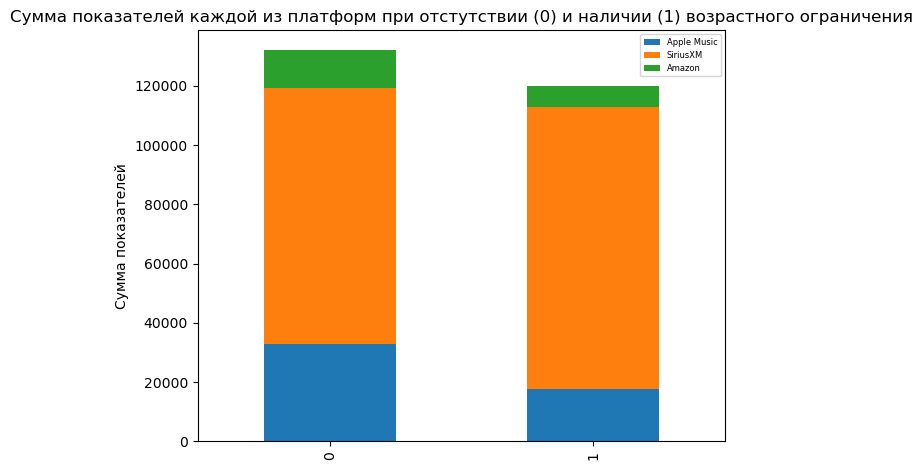

In [197]:
Bar.iloc[:, 6:9].plot.bar(stacked=True)
plt.title('Сумма показателей каждой из платформ при отстутствии (0) и наличии (1) возрастного ограничения')
plt.ylabel('Сумма показателей')
plt.xlabel('')
plt.legend(prop={'size' : 6})
plt.tight_layout()
plt.savefig('Exp_track_3.jpeg',bbox_inches='tight', dpi=300)

    Приведённые диаграммы показывают, что на преобладающем большинстве платформ, наибольшей популярностью обладают треки не имеющие возрастного ограничения. Исключение составляют такие платформы как SiriusXM и особенно SoundCloud.

In [89]:
a = []
for i in df.columns[7:-1]:

    if i == 'Soundcloud Streams':
        t = df[df['Explicit Track'] == 0].sort_values(i, ascending=False).head(1)[df.columns[:5]]
    else:
        t = df.sort_values(i, ascending=False).head(1)[df.columns[:5]]
        
    t.index = [i]*t.index.nunique()
    a.append(t)
    
result = pd.concat(a, axis=0)
result['Track']['TikTok Posts'] = 'Laxed (Siren Beat)'
result['Album Name']['YouTube Views'] = '-'
result.to_excel('result.xlsx')
result

/tmp/ipykernel_12855/3105555305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Track']['TikTok Posts'] = 'Laxed (Siren Beat)'
/tmp/ipykernel_12855/3105555305.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Album Name']['YouTube Views'] = '-'


,Track,Album Name,Artist,Release Date,ISRC
Spotify Streams,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206
Spotify Playlist Count,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206
Spotify Playlist Reach,Espresso,Espresso,Sabrina Carpenter,2024-04-12,USUM72403305
Spotify Popularity,A Bar Song (Tipsy),A Bar Song (Tipsy),Shaboozey,2024-04-12,USUYG1541249
YouTube Views,Baby Shark,-,Pinkfong,2015-12-01,KRE671700001
YouTube Likes,Dynamite,Dynamite,BTS,2020-08-21,QM7282022872
TikTok Posts,Laxed (Siren Beat),Laxed (Siren Beat),Jawsh 685,2020-04-24,NZAM02001128
TikTok Likes,Monkeys Spinning Monkeys,SteamFun - Single,Kevin MacLeod,2011-05-16,USUAN1400011
TikTok Views,Monkeys Spinning Monkeys,SteamFun - Single,Kevin MacLeod,2011-05-16,USUAN1400011
YouTube Playlist Reach,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612


    Интересный факт. С детской песней Baby Shark, ставшей самой просматриваемой на youtube в 2024 году, был связан криминальный инцидент. Сотрудники тюрьмы округа Оклахома в США, пытали этой песней заключённых, за что в 2020 году им были предъявлены обвинения в жестоком обращении с ними.